# Project 2 - NO2

## Description

The data are a subsample of 500 observations from a data set that originate in a study submitted by Magne Aldrin [28/Jul/04].
Aim of the study was to verify whether air pollution at a road is related to traffic volume and meteorological variables, collected by the Norwegian Public Roads Administration.

Description of the variables:
- **x1** hourly values of the logarithm of the concentration of NO2 (particles), measured at Alnabru in Oslo, Norway, between October 2001 and August 2003.
- **x2** logarithm of the number of cars per hour
- **x3** temperature 2 meters above ground (Celsius degrees)
- **x4** wind speed (meters/second)
- **x5** temperature difference between 25 and 2 meters above ground (Celsius degrees)
- **x6** wind direction (degrees between 0 and 360),
- **x7**, **x8** hour of day and day number from October 1, 2001

## Solution

### Data preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

Read the dataset and rename the columns in a meaningful way

In [2]:
column_map = {
    "x1": "log_no2",
    "x2": "log_cars_num",
    "x3": "temp_2",
    "x4": "wind_speed",
    "x5": "temp_diff_25_2",
    "x6": "wind_dir",
    "x7": "hour",
    "x8": "day"
}

data = pd.read_csv("NO2.csv").rename(columns=column_map)
data.head()

,log_no2,log_cars_num,temp_2,wind_speed,temp_diff_25_2,wind_dir,hour,day
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115


Create a meaningful **date** column which will contain exact date in *yyyy-mm-dd* format starting from October 1, 2001 as mentioned in the description.

In [3]:
import datetime

start_date = datetime.date(2001, 10, 1)
data["date"] = data.apply(lambda x: datetime.timedelta(days=x["day"]) + start_date, axis=1)
data["date"] = pd.to_datetime(data["date"])
data.head()

,log_no2,log_cars_num,temp_2,wind_speed,temp_diff_25_2,wind_dir,hour,day,date
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600,2003-05-24
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196,2002-04-15
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513,2003-02-26
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143,2002-02-21
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115,2002-01-24


Now we create some additional columns like **dow** (day of week), **month** and **yea**. We can use them in the further analysis while applying aggregation functions over the time frame, e.g. comparing the mean **log_no2** value in each day of the week.

In [4]:
data["dow_name"] = data["date"].dt.day_name()
data["dow_num"] = data["date"].dt.day_of_week
data["month_num"] = data["date"].dt.month
data["month_name"] = data["date"].dt.month_name()
data["year"] = data["date"].dt.year
data.head()

,log_no2,log_cars_num,temp_2,wind_speed,temp_diff_25_2,wind_dir,hour,day,date,dow_name,dow_num,month_num,month_name,year
0,3.71844,7.69120,9.2,4.8,-0.1,74.4,20,600,2003-05-24,Saturday,5,5,May,2003
1,3.10009,7.69894,6.4,3.5,-0.3,56.0,14,196,2002-04-15,Monday,0,4,April,2002
2,3.31419,4.81218,-3.7,0.9,-0.1,281.3,4,513,2003-02-26,Wednesday,2,2,February,2003
3,4.38826,6.95177,-7.2,1.7,1.2,74.0,23,143,2002-02-21,Thursday,3,2,February,2002
4,4.34640,7.51806,-1.3,2.6,-0.1,65.0,11,115,2002-01-24,Thursday,3,1,January,2002


### Quantitative univariate analysis

**IMPORTANT** For drawing the plots I suggest you using **matplotlib** or **seaborn**. Please NAME YOUR X AND Y VARIABLES on each plot and WRITE DOWN YOUR CONCLUSIONS after each task completed.

**Task 1.1** Draw the **histograms** of the variables *log_cars_num*, *wind_speed*, *wind_dir*.

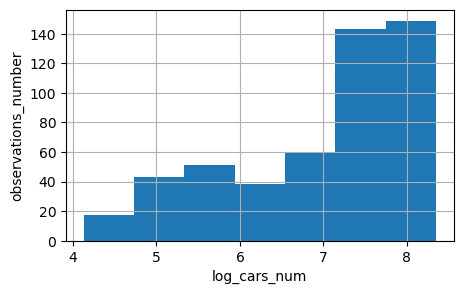

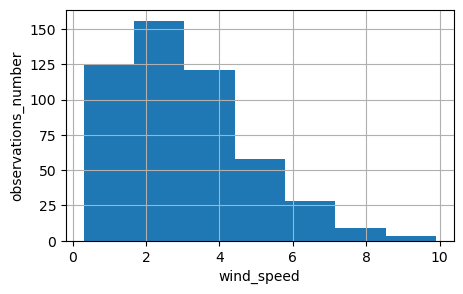

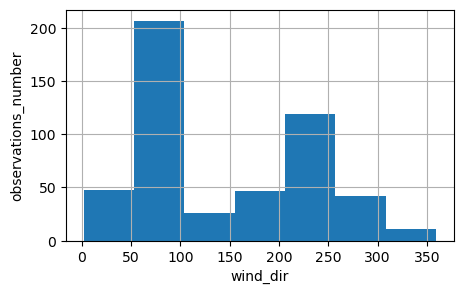

In [5]:
data['log_cars_num'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('log_cars_num')
plt.ylabel('observations_number')
plt.show()

data['wind_speed'].hist(bins = 7, figsize = (5, 3))
plt.xlabel('wind_speed')
plt.ylabel('observations_number')
plt.show()

data['wind_dir'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('wind_dir')
plt.ylabel('observations_number')
plt.show()

Three histograms are presented here, reflecting the frequency distribution of the parameters log_cars_num, wind_speed, wind_dir relative to the total number of observations. <br>

The first graph shows that in more than half of the observations, the logarithm of the number of cars was 7 or more. <br>

In the case of wind speed observations, the most frequent values were between 0.3 and 4.4 meters per second. <br>

In the direction of the wind, the northern - northeastern and western directions prevailed.

**Task 1.2** Draw the joint **histogram** (two histograms of different color in one plot) of the temperature at the 2 meters and 25 meters above the ground (you need to create the latter value by yourself).

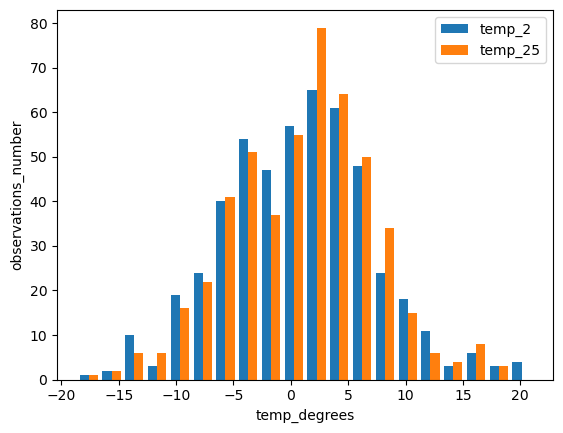

In [6]:
data["temp_25"] = data["temp_2"] + data["temp_diff_25_2"]
attributes = ["temp_2", "temp_25"]
plt.hist(data[attributes], bins = 20, label=["temp_2", "temp_25"])
plt.legend(loc='upper right')
plt.xlabel('temp_degrees')
plt.ylabel('observations_number')
plt.show()## Your code here

For the chart, a temperature indicator variable was additionally created at 25 meters above the ground. <br>

It can be seen from the diagram that both at level of 2 and at the level of 25 meters above the ground,
the most common temperature indicator (mode) was about 3 degrees. In general, the number of observations
is enough to observe the distribution tending to normal.

**Task 1.3** Draw the **boxplots** of the variables *log_cars_num*, *temp_2*, *wind_speed*, *wind_dir* grouped by each time frame *dow*, *month*, *year*. You should be able to analyze how the temperature varies across months on a single plot.

**Hint 1**: You may need the **hue** parameter in the plotting function to group the variables by time. See examples for interpretation in the documentation
**Hint 2:** You should end up with 12 plots in total, so try to optimize you code by running the drawing function in a cycle.

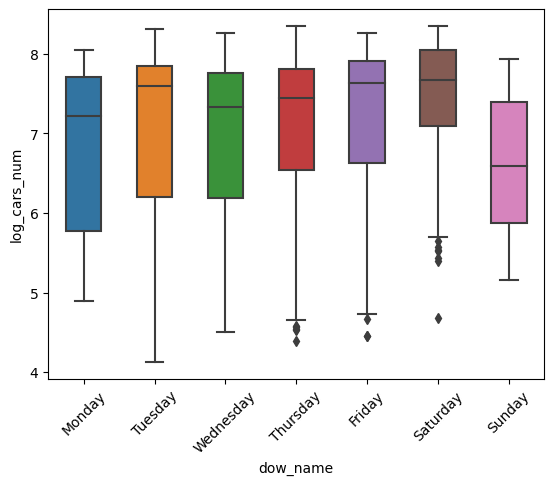

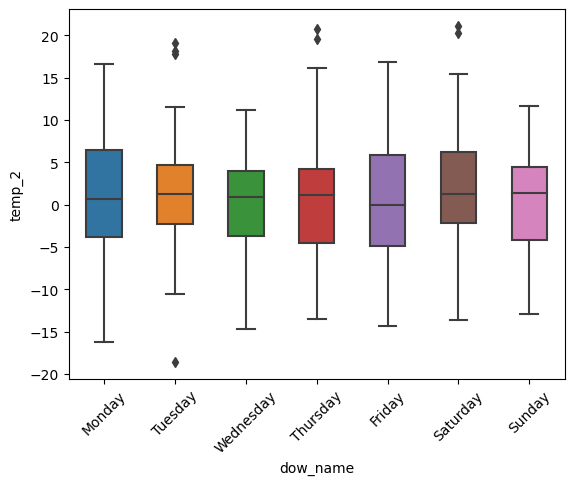

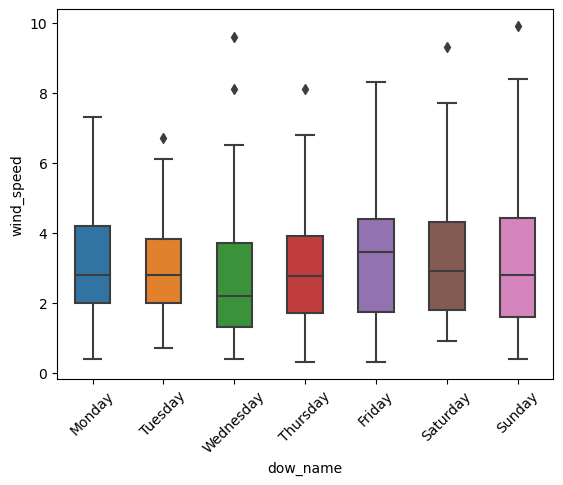

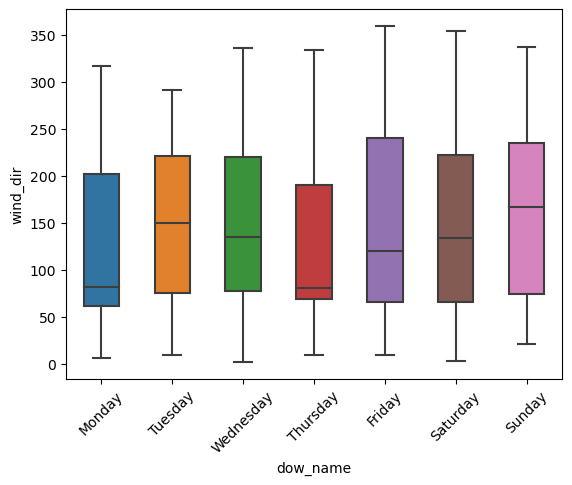

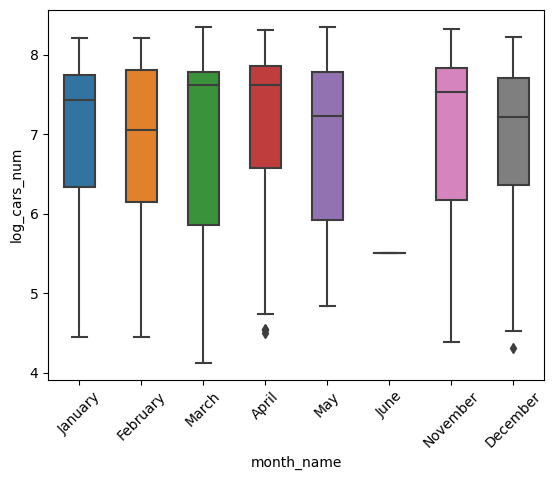

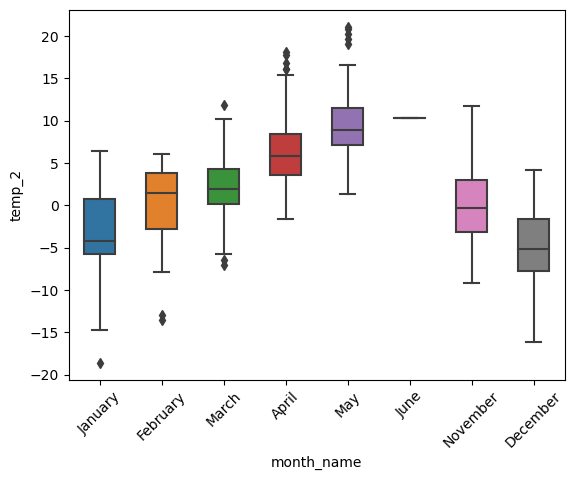

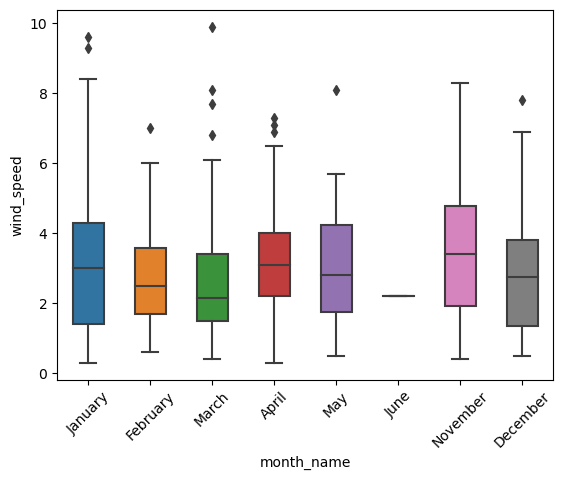

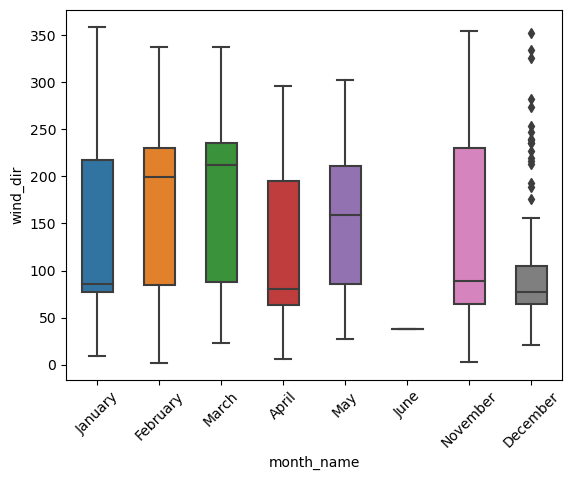

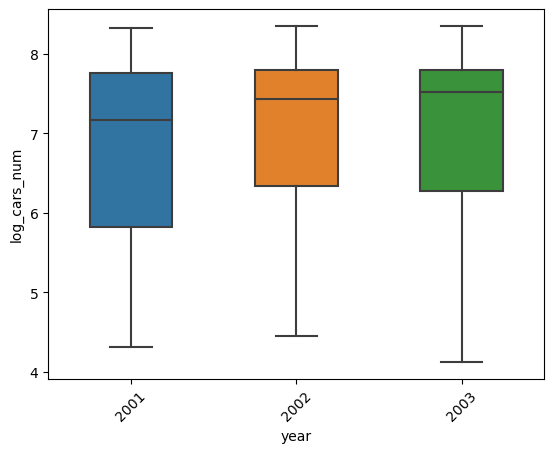

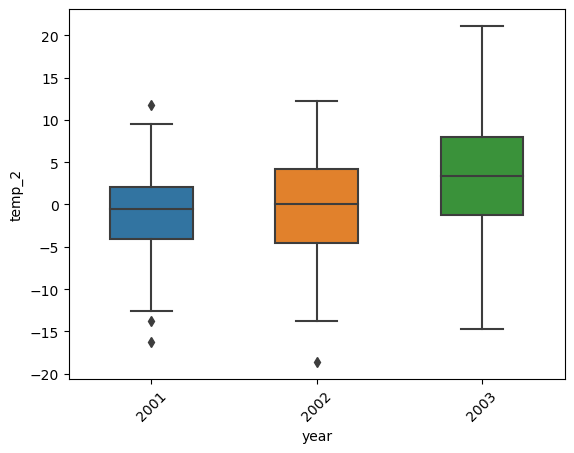

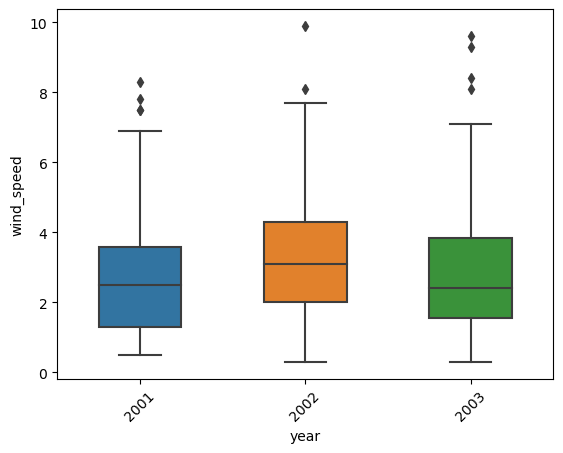

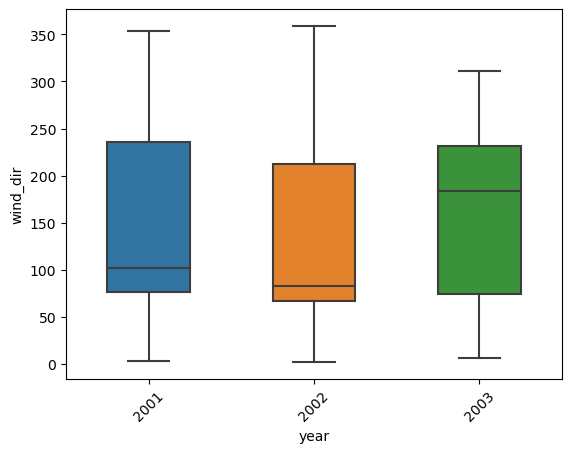

In [7]:
X_var = ['dow_name', 'dow_name', 'dow_name', 'dow_name', 'month_name', 'month_name',
         'month_name','month_name', 'year', 'year', 'year', 'year']
Y_var = ['log_cars_num', 'temp_2', 'wind_speed', 'wind_dir', 'log_cars_num', 'temp_2',
         'wind_speed', 'wind_dir', 'log_cars_num', 'temp_2', 'wind_speed', 'wind_dir' ]
for i in range(0, 4):
    sns.boxplot(x = X_var[i], y = Y_var[i] , data = data.sort_values('dow_num'), width = 0.5)
    plt.xticks(rotation = 45)
    plt.show()
for i in range(4, 8):
    sns.boxplot(x = X_var[i], y = Y_var[i] , data = data.sort_values('month_num'), width = 0.5)
    plt.xticks(rotation = 45)
    plt.show()
for i in range(8, 12):
    sns.boxplot(x = X_var[i], y = Y_var[i] , data = data.sort_values('year'), width = 0.5)
    plt.xticks(rotation = 45)
    plt.show()

There are no anomalies in temperature changes during the year. <br>

According to observations, the median temperature in November is approximately at the level of 0 degrees,
then in December and January it remains at approximately -5, -4 degrees, and from February it begins to gradually rise
every month, reaching 9 degrees in May.

**Task 1.4** Return NO2 and number of cars to the original scale by raising those variables to exponent. Draw the histograms of the new variables and explain why the logarithm was used originally.

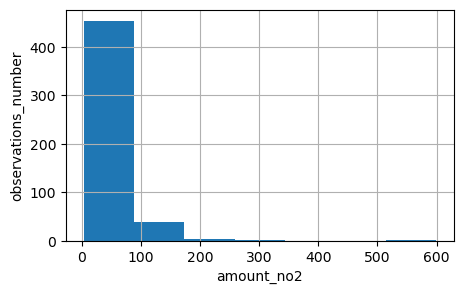

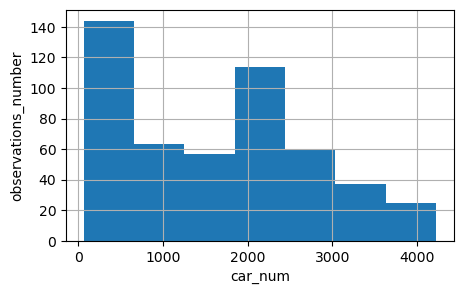

In [8]:
data['no2'] = np.exp(data['log_no2'])
data['cars_num'] = np.exp(data['log_cars_num'])
data['no2'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('amount_no2')
plt.ylabel('observations_number')
plt.show()
data['cars_num'].hist(bins = 7, figsize=(5, 3))
plt.xlabel('car_num')
plt.ylabel('observations_number')
plt.show()

The logarithm in the data visualization process is used to normalize the values so that when the indicators change,
the changes are fixed not in units, but in percentages. Thus,
the scale of values is reduced and the calculation becomes more convenient.

### Time series analysis

**Task 2.1** Plot the mean temperature each month for all time period. You should end up with a plot where x-axis is a format *yyyy-mm* and y-axis is the mean temperature in the corresponding month. Make sure your x-values are sorted in ascending order.

**Hint** Create a new column *yyyy-mm* and apply `sns.lineplot` with correct parameters. You should end up with the line which connects the points in the plot with the corresponding confidence interval for the variable out of the box! Please refer to the documentation

In [9]:
data['time_y_m'] = data['year'].astype(str) + '-' + data['month_num'].astype(str).str.zfill(2)

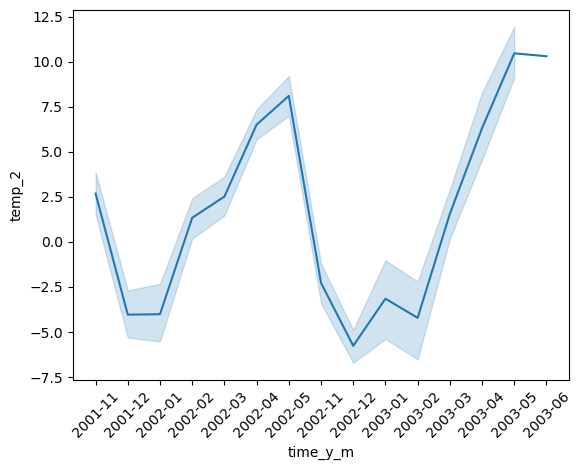

In [10]:
sns.lineplot(x = 'time_y_m', y = 'temp_2', estimator=np.mean, data = data.sort_values('time_y_m'))
plt.xticks(rotation = 45)
plt.show()

**Task 2.2** Plot the mean for other variables in the dataset across month and make a conclusion if you see any dynamic.

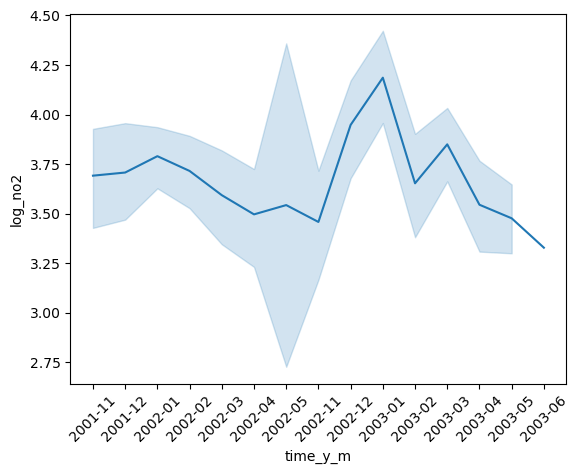

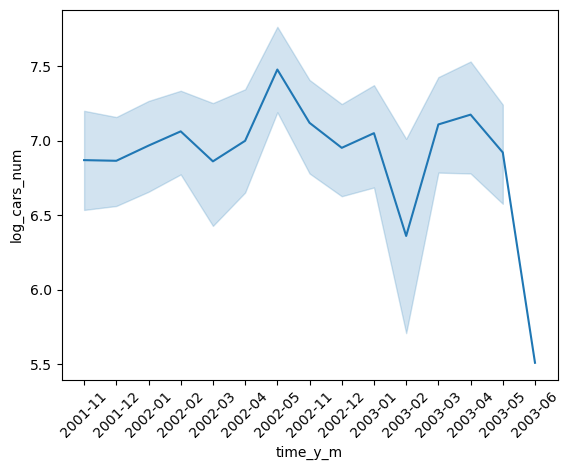

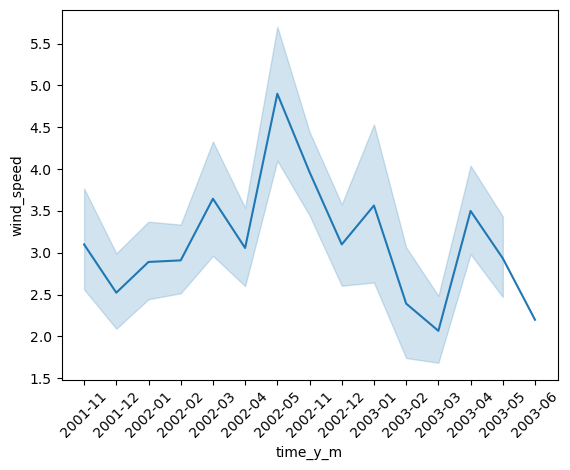

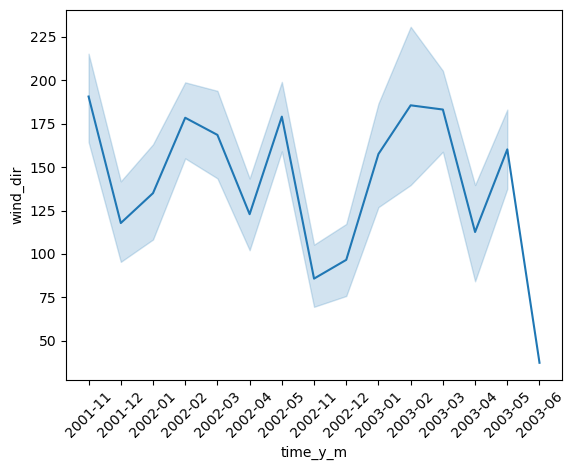

In [11]:
x_var = ['time_y_m', 'time_y_m', 'time_y_m', 'time_y_m']
y_var = ['log_no2', 'log_cars_num','wind_speed', 'wind_dir']
for i in range(0, 4):
    sns.lineplot(x = x_var[i], y = y_var[i], data = data.sort_values('time_y_m'))
    plt.xticks(rotation = 45)
    plt.show()

**Task 2.3** Plot the mean temperature, number of cars, and wind direction each hour of the day.

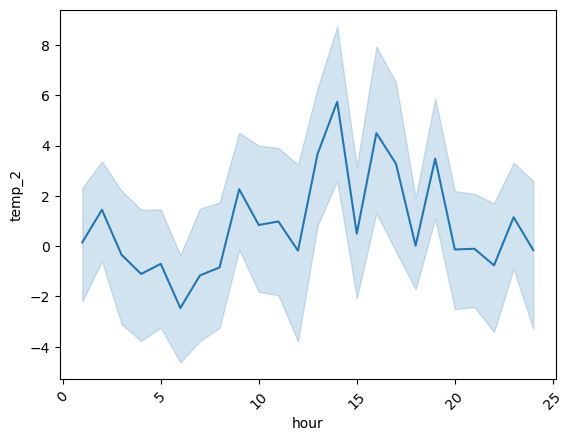

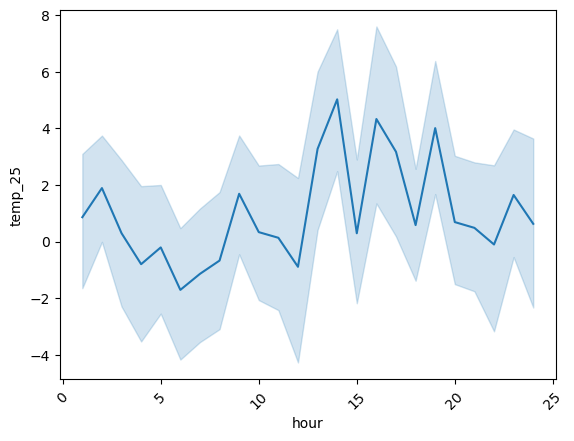

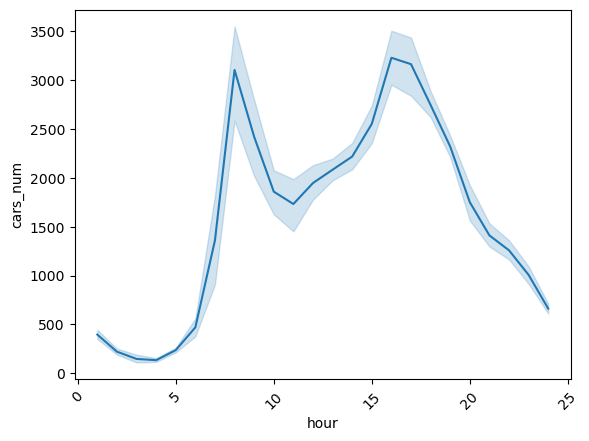

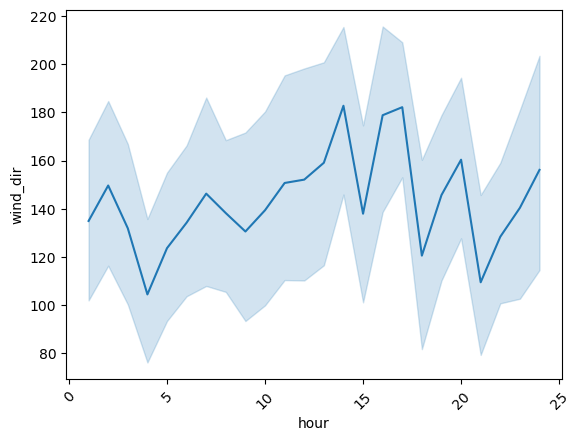

In [12]:
x_axis = ['hour', 'hour', 'hour', 'hour']
y_axis = ['temp_2', 'temp_25','cars_num', 'wind_dir']
for i in range(0, 4):
    sns.lineplot(x = x_axis[i], y = y_axis[i], data = data.sort_values('hour'))
    plt.xticks(rotation = 45)
    plt.show()

### Answering the project questions

**1. Divide the hour of day into day and night hours, paying also attention to the season, that is quite relevant in Norway. Is there a significant difference in the mean of concentration of NO2 during day and night hours?**

**Hint 1** There are different daylight hours in different seasons of the year. You need to check it specifically for Norway in the internet and include that information in the dataframe, e.g. create a separate columns with the start and end hours of light day each month. Then you need to create a binary column *day-night* where you specify if this record falls into the day or the night hours.

**Hint 2** *Significant difference* means that you need to test the hypothesis of the mean equivalence between samples in the day and night hours:
H0: m1=m2
H1: m1 != m2

Please refer to our lectures how we did that. Use `scipy.stats.t.ppf` or `scipy.stats.norm.ppf` for calculating the inverse cumulative distribution function instead of referring to the tables in the internet. Make the significance level *alpha* of the test an adjusted variable.

**Hint 3** Before moving to the actual hypothesis testing try to simply visualize that difference somehow and make your own assumptions

|Month | Sunrise | Sunset | Hours of daylight|
| --- | --- | --- | --- |
|January|	09:00 am|	03:51 pm|	6:51 h| 
|February|	07:52 am|	05:10 pm|	9:18 h|
|March|	06:31 am|	06:20 pm|	11:49 h|
|April|	05:57 am|	08:36 pm|	14:38 h|
|May|	04:36 am|	09:50 pm|	17:14 h|
|June|	03:50 am|	10:44 pm|	18:54 h|
|July|	04:18 am|	10:27 pm|	18:09 h|
|August|	05:29 am|	09:13 pm|	15:44 h|
|September|	06:43 am|	07:41 pm|	12:58 h|
|October|	07:54 am|	06:11 pm|	10:17 h|
|November|	08:11 am|	03:51 pm|	7:39 h|
|December|	09:10 am|	03:14 pm|	6:04 h|

Create column "daylight" for observation when daylight is True, depending on season 

In [13]:
daylight_begin_end_map = {
    "January": (datetime.time(9,0,0), datetime.time(15,51,0)),
    "February": (datetime.time(7,52,0), datetime.time(17,10,0)),
    "March": (datetime.time(6,31,0), datetime.time(18,20,0)),
    "April": (datetime.time(5,57,0), datetime.time(20,36,0)),
    "May": (datetime.time(4,36,0), datetime.time(21,50,0)),
    "June": (datetime.time(3,50,0), datetime.time(22,44,0)),
    "July": (datetime.time(4,18,0),  datetime.time(22,27,0)),
    "August": (datetime.time(5,29,0), datetime.time(21,13,0)),
    "September": ( datetime.time(6,43,0), datetime.time(19,41,0)),
    "October": (datetime.time(7,54,0), datetime.time(18,11,0)),
    "November": (datetime.time(8,11,0), datetime.time(15,51,0)),
    "December": (datetime.time(9,10,0), datetime.time(15,14,0))
}

data["daylight_begin"] = data.apply(lambda x: daylight_begin_end_map[x["month_name"]][0], axis=1)
data["daylight_end"] = data.apply(lambda x: daylight_begin_end_map[x["month_name"]][1], axis=1)

data["time"] = data["hour"].apply(lambda x: datetime.time(int(x) % 24, 0, 0))

data["daylight"] = data.apply(lambda x: int((x["time"] > x["daylight_begin"]) &
                                          (x["time"] < x["daylight_end"])), axis=1)

Visialize the distribution per 2 group depending on meaning of column "daylight"

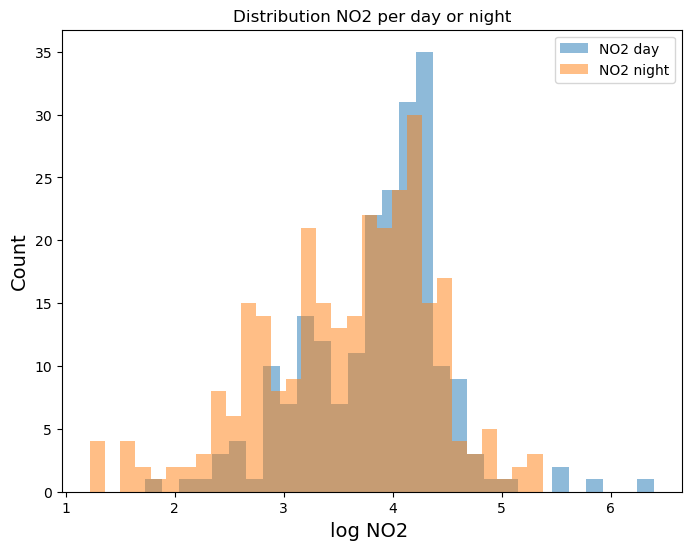

In [14]:
plt.figure(figsize=(8,6))
plt.hist(data["log_no2"].loc[data["daylight"] == 1], bins=30, alpha=0.5, label="NO2 day")
plt.hist(data["log_no2"].loc[data["daylight"] == 0], bins=30, alpha=0.5, label="NO2 night")

plt.xlabel("log NO2 ", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution NO2 per day or night")
plt.legend(loc='upper right');

Describe two calculated groups

In [15]:
print( data["log_no2"].loc[data["daylight"] == 1].describe() )
print()
print( data["log_no2"].loc[data["daylight"] == 0].describe() )

count    212.000000
mean       3.860189
std        0.645093
min        1.722770
25%        3.429135
50%        4.006410
75%        4.278742
max        6.395090
Name: log_no2, dtype: float64

count    288.000000
mean       3.579249
std        0.800021
min        1.223780
25%        3.081880
50%        3.720860
75%        4.167830
max        5.373890
Name: log_no2, dtype: float64


In [16]:
data["log_no2"].loc[data["daylight"] == 1].std() / data["log_no2"].loc[data["daylight"] == 0].std()

0.8063457474963489

The variance between two group more than 1/2 and less then 2, that means we will use T-test for unequal group size with same variance

https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

In [17]:
from scipy.stats import t

def two_tailed_t_test(array_1, array_2):
    array_1_mean = array_1.mean()
    array_2_mean = array_2.mean()
    
    array_1_df = len(array_1) 
    array_2_df = len(array_2) 
    
    array_1_std = array_1.std()
    array_2_std = array_2.std()
    
    s_p = np.sqrt( ((array_1_df - 1) * array_1_std**2 + (array_2_df - 1) * array_2_std**2) / (array_1_df + array_2_df - 2) )
    
    t_stat = (array_1_mean - array_2_mean) / ( np.sqrt( 1/array_1_df + 1/array_2_df ) * s_p) 
    
    p = (1 - t.cdf(abs(t_stat), (array_1_df+array_2_df-2) )) * 2
    
    return p

In [18]:
two_tailed_t_test( data["log_no2"].loc[data["daylight"] == 1], data["log_no2"].loc[data["daylight"] == 0] )

3.1011003091441225e-05

Comparing with in-built implementation

In [19]:
from scipy.stats import stats

stats.ttest_ind( data["log_no2"].loc[data["daylight"] == 1], data["log_no2"].loc[data["daylight"] == 0] )

Ttest_indResult(statistic=4.2046125789336815, pvalue=3.101100309145081e-05)

**2.Divide each of the climatic variables x3,x4,x5 into two groups (high temperature/low temperature, high wind speed/low wind speed, etc.) and check for each of them if there is a significant difference in the mean of concentration of NO2 in the two identified groups**

**Hint 1** Based on the distribution of variables x3, x4, x5 choose the reasonable threshold for *high* and *low* values and explain your decision.

**Hint 2** Please refer to the *Hint 2* of the first task regarding the hypothesis testing.

**Hint 3** Before moving to the actual hypothesis testing try to simply visualize that difference somehow and make your own assumptions

**Wind speed**

Let's separate observations into groups by mean value of wind speed

count    219.000000
mean       3.418978
std        0.775945
min        1.223780
25%        2.960090
50%        3.484310
75%        4.040385
max        4.906020
Name: log_no2, dtype: float64

count    281.000000
mean       3.916113
std        0.653181
min        1.740470
25%        3.484310
50%        4.019980
75%        4.297290
max        6.395090
Name: log_no2, dtype: float64


C:\Users\Dzmitry_Kurch\AppData\Local\Temp\ipykernel_21384\2571378501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["wind_speed_mean_high"].loc[data["wind_speed"] >= wind_speed_mean] = 1


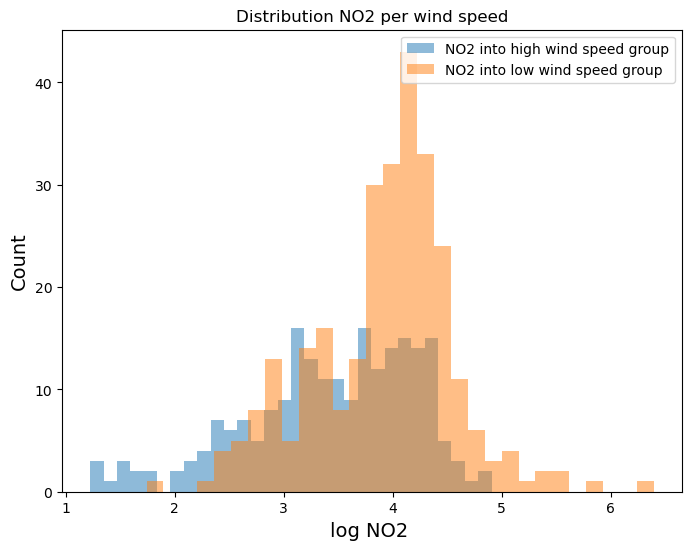

In [20]:
wind_speed_mean = data["wind_speed"].mean()
data["wind_speed_mean_high"] = 0
data["wind_speed_mean_high"].loc[data["wind_speed"] >= wind_speed_mean] = 1

print(data["log_no2"].loc[data["wind_speed_mean_high"] == 1].describe())
print()
print(data["log_no2"].loc[data["wind_speed_mean_high"] == 0].describe())

plt.figure(figsize=(8,6))
plt.hist(data["log_no2"].loc[data["wind_speed_mean_high"] == 1], bins=30, alpha=0.5, label="NO2 into high wind speed group")
plt.hist(data["log_no2"].loc[data["wind_speed_mean_high"] == 0], bins=30, alpha=0.5, label="NO2 into low wind speed group")

plt.xlabel("log NO2 ", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution NO2 per wind speed")
plt.legend(loc='upper right');v

In [21]:
data["log_no2"].loc[data["wind_speed_mean_high"] == 1].std()/data["log_no2"].loc[data["wind_speed_mean_high"] == 0].std()

1.187947489630274

The variance between two group more than 1/2 and less then 2, that means we will use T-test for unequal group size with same variance

In [22]:
two_tailed_t_test(data["log_no2"].loc[data["wind_speed_mean_high"] == 1], data["log_no2"].loc[data["wind_speed_mean_high"] == 0])

4.440892098500626e-14

P-value is less than 0.01. That means we reject null hypothesis. Hourly values of the logarithm of the concentration of NO2 depends on temperature

**Temperature**

Let's separate observations into groups by mean value of temperature

count    259.000000
mean       3.575378
std        0.715676
min        1.360980
25%        3.095565
50%        3.742420
75%        4.131960
max        5.781050
Name: log_no2, dtype: float64

count    241.000000
mean       3.830543
std        0.766106
min        1.223780
25%        3.397860
50%        3.966510
75%        4.284960
max        6.395090
Name: log_no2, dtype: float64


C:\Users\Dzmitry_Kurch\AppData\Local\Temp\ipykernel_21384\1171750706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["temp_2_mean_high"].loc[data["temp_2"] >= temp_2_mean] = 1


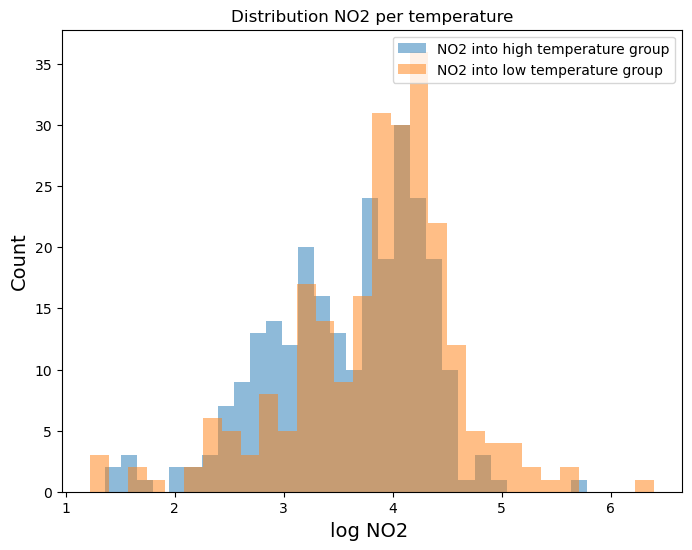

In [23]:
temp_2_mean = data["temp_2"].mean()
data["temp_2_mean_high"] = 0
data["temp_2_mean_high"].loc[data["temp_2"] >= temp_2_mean] = 1

print(data["log_no2"].loc[data["temp_2_mean_high"] == 1].describe())
print()
print(data["log_no2"].loc[data["temp_2_mean_high"] == 0].describe())

plt.figure(figsize=(8,6))
plt.hist(data["log_no2"].loc[data["temp_2_mean_high"] == 1], bins=30, alpha=0.5, label="NO2 into high temperature group")
plt.hist(data["log_no2"].loc[data["temp_2_mean_high"] == 0], bins=30, alpha=0.5, label="NO2 into low temperature group")

plt.xlabel("log NO2 ", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution NO2 per temperature")
plt.legend(loc='upper right');

In [24]:
data["log_no2"].loc[data["temp_2_mean_high"] == 1].std()/data["log_no2"].loc[data["temp_2_mean_high"] == 0].std()

0.934174246428704

The variance between two group more than 1/2 and less then 2, that means we will use T-test for unequal group size with same variance

In [25]:
two_tailed_t_test(data["log_no2"].loc[data["temp_2_mean_high"] == 1], data["log_no2"].loc[data["temp_2_mean_high"] == 0])

0.00013322016071026788

P-value is less than 0.01. That means we reject null hypothesis. Hourly values of the logarithm of the concentration of NO2 depends on temperature

**Temperature difference**

Let's separate observations into groups by mean value of temperature diffirence

count    222.000000
mean       3.839390
std        0.755342
min        1.223780
25%        3.375025
50%        3.940605
75%        4.265490
max        6.395090
Name: log_no2, dtype: float64

count    278.000000
mean       3.585753
std        0.728739
min        1.280930
25%        3.148450
50%        3.775045
75%        4.169748
max        5.112590
Name: log_no2, dtype: float64


C:\Users\Dzmitry_Kurch\AppData\Local\Temp\ipykernel_21384\1786017015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["temp_diff_25_2_mean_high"].loc[data["temp_diff_25_2"] >= temp_diff_25_2_mean] = 1


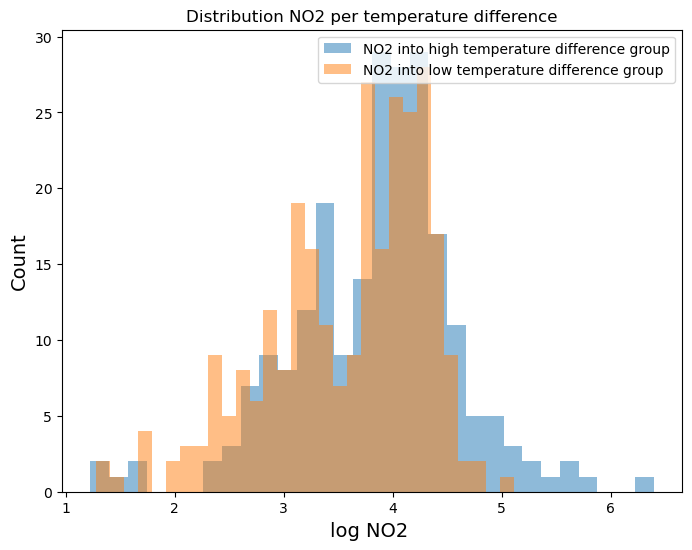

In [26]:
temp_diff_25_2_mean = data["temp_diff_25_2"].mean()
data["temp_diff_25_2_mean_high"] = 0
data["temp_diff_25_2_mean_high"].loc[data["temp_diff_25_2"] >= temp_diff_25_2_mean] = 1

print(data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 1].describe())
print()
print(data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 0].describe())

plt.figure(figsize=(8,6))
plt.hist(data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 1], bins=30, alpha=0.5, label="NO2 into high temperature difference group")
plt.hist(data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 0], bins=30, alpha=0.5, label="NO2 into low temperature difference group")

plt.xlabel("log NO2 ", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution NO2 per temperature difference")
plt.legend(loc='upper right');

In [27]:
data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 1].std()/data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 0].std()

1.0365055065735418

The variance between two group more than 1/2 and less then 2, that means we will use T-test for unequal group size with same variance

In [28]:
two_tailed_t_test(data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 1], data["log_no2"].loc[data["temp_diff_25_2_mean_high"] == 0])

0.00015971560196548218

P-value less than 0.1, 0.05 and 0.01. That means we reject null hypothesis. Hourly values of the logarithm of the concentration of NO2 depends on temperature difference

*3. Divide x2 into two groups (high number of cars/low number of cars), and check if there is a significant difference in the mean of concentration of NO2 in the two identified groups*

**Hint 1** Based on the distribution of variable x2 choose the reasonable threshold for *high* and *low* values and explain your decision. Try to convert the variable to the original scale and see if that helps

**Hint 2** Please refer to the *Hint 2* of the first task regarding the hypothesis testing.

**Hint 3** Before moving to the actual hypothesis testing try to simply visualize that difference somehow and make your own assumptions

**Number of cars**

Let's separate observations into groups by mean value of car number

count    308.000000
mean       3.983141
std        0.582201
min        2.104130
25%        3.708672
50%        4.074140
75%        4.319150
max        6.395090
Name: log_no2, dtype: float64

count    192.000000
mean       3.241545
std        0.765858
min        1.223780
25%        2.758332
50%        3.238680
75%        3.865963
max        5.373890
Name: log_no2, dtype: float64


C:\Users\Dzmitry_Kurch\AppData\Local\Temp\ipykernel_21384\2621762475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["log_cars_num_high"].loc[data["log_cars_num"] >= mean_log_car] = 1


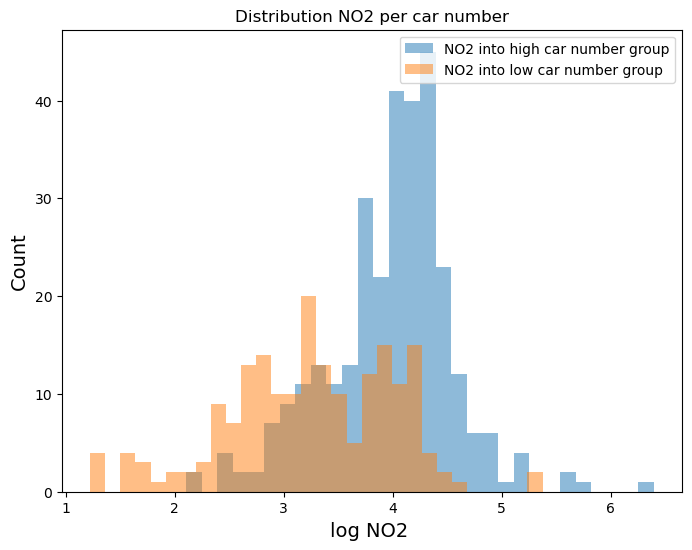

In [29]:
mean_log_car = data["log_cars_num"].mean()
data["log_cars_num_high"] = 0
data["log_cars_num_high"].loc[data["log_cars_num"] >= mean_log_car] = 1

print(data["log_no2"].loc[data["log_cars_num_high"] == 1].describe())
print()
print(data["log_no2"].loc[data["log_cars_num_high"] == 0].describe())

plt.figure(figsize=(8,6))
plt.hist(data["log_no2"].loc[data["log_cars_num_high"] == 1], bins=30, alpha=0.5, label="NO2 into high car number group")
plt.hist(data["log_no2"].loc[data["log_cars_num_high"] == 0], bins=30, alpha=0.5, label="NO2 into low car number group")

plt.xlabel("log NO2 ", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution NO2 per car number")
plt.legend(loc='upper right');

In [30]:
data["log_no2"].loc[data["log_cars_num_high"] == 1].std()/data["log_no2"].loc[data["log_cars_num_high"] == 0].std()

0.7601948486386835

The variance between two group more than 1/2 and less then 2, that means we will use T-test for unequal group size with same variance

In [31]:
two_tailed_t_test(data["log_no2"].loc[data["log_cars_num_high"] == 1], data["log_no2"].loc[data["log_cars_num_high"] == 0])

0.0

P-value is less than 0.01. That means we reject null hypothesis. Hourly values of the logarithm of the concentration of NO2 depends on number of cars

**4.Deduce which of the variables x2-x8 is more influent in changing the concentration of NO2 in the air, discussing also the presence of possible correlations between x2-x8**

**Step 1** Plot simple scatter plots of variables x2-x8 with NO2 and make the conclusion about the relationship of those variables
**Step 2** Calculate the Pearson correlation between variables x2-x8 with NO2
**Step 3 HARD LEVEL** Build a simple linear regression by choosing x2-x8 as X variables and predict Y variable N02. Measure the quality of the model. Analyze the feature weights and draw the conclusion about each feature contribution to the total result.

**Some scatter plots**

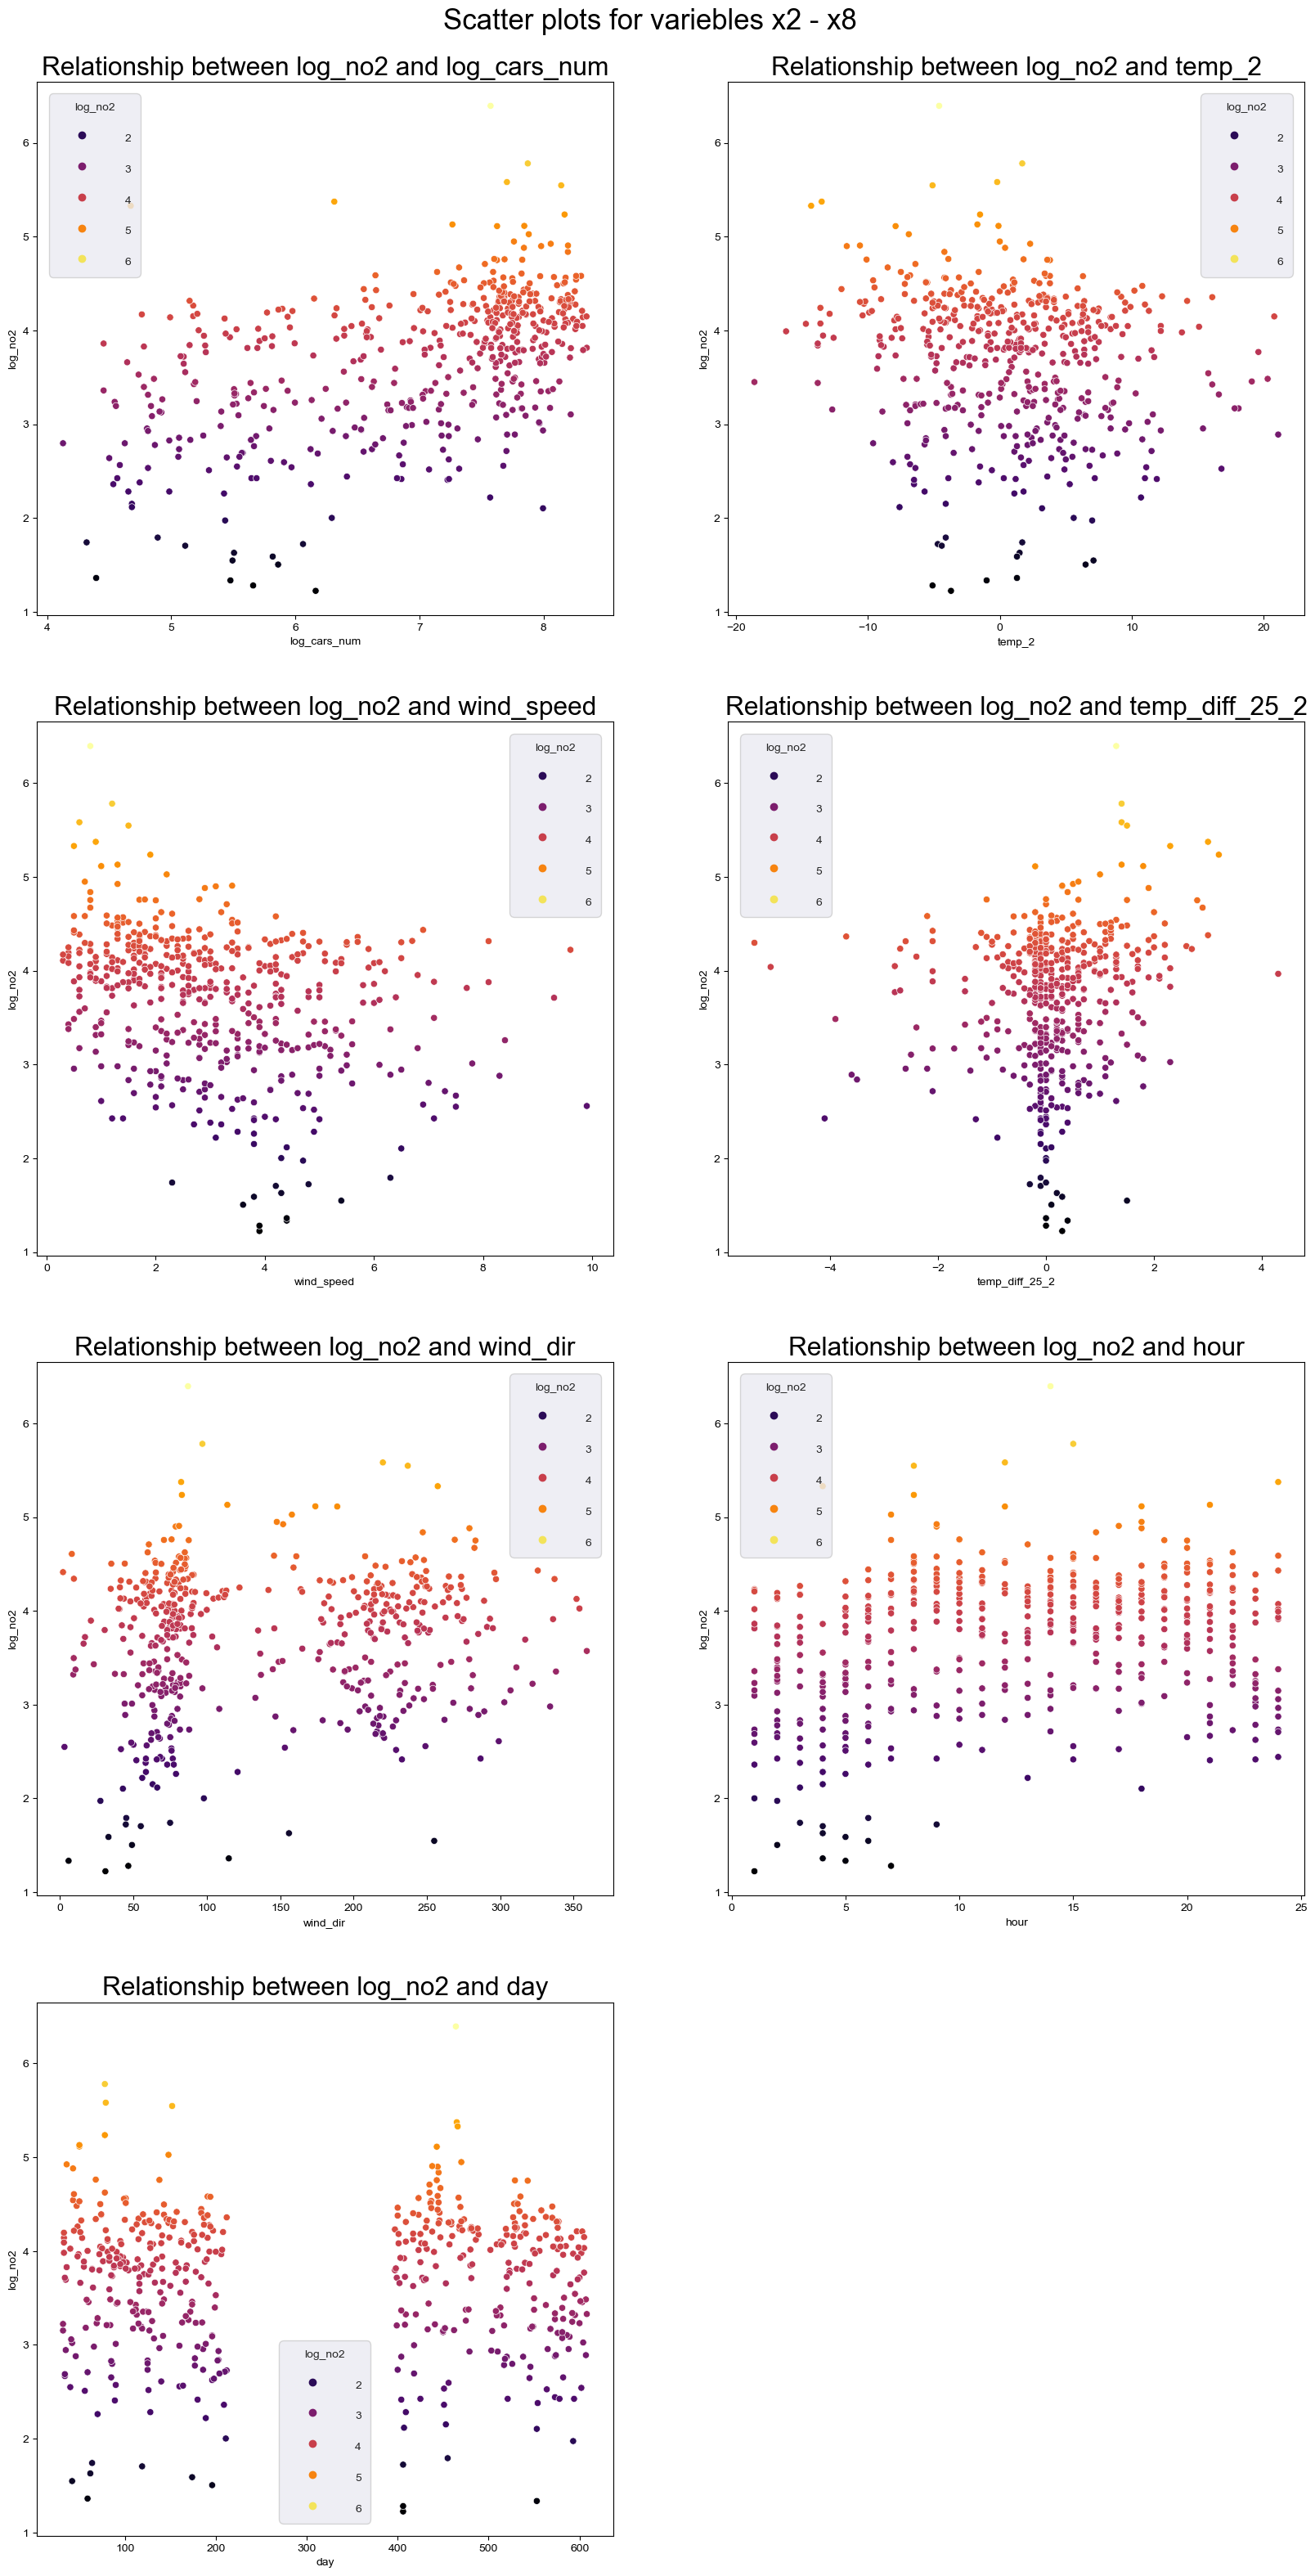

In [32]:
figure, axis = plt.subplots(4, 2, figsize=(20, 30))
figure.delaxes(axis[3, 1])
figure.suptitle("Scatter plots for variebles x2 - x8", fontsize=25, y=2.03)
figure.subplots_adjust(bottom=1, top=2)

axis.all()

x_labels = list(data.columns)[1:8];
y_label = "log_no2";
sns.set(font_scale=1.9)

for x_label, ax in zip(x_labels, axis.ravel()):
    sns.scatterplot(data=data, x=data[x_label], y=data[y_label], ax=ax, hue=y_label, palette="inferno").set(title="Relationship between {} and {}".format(y_label, x_label))
    plt.setp(ax.get_legend().get_texts(), fontsize="10")
    plt.setp(ax.get_legend().get_title(), fontsize="10")
plt.show()

**Correlation matrix**

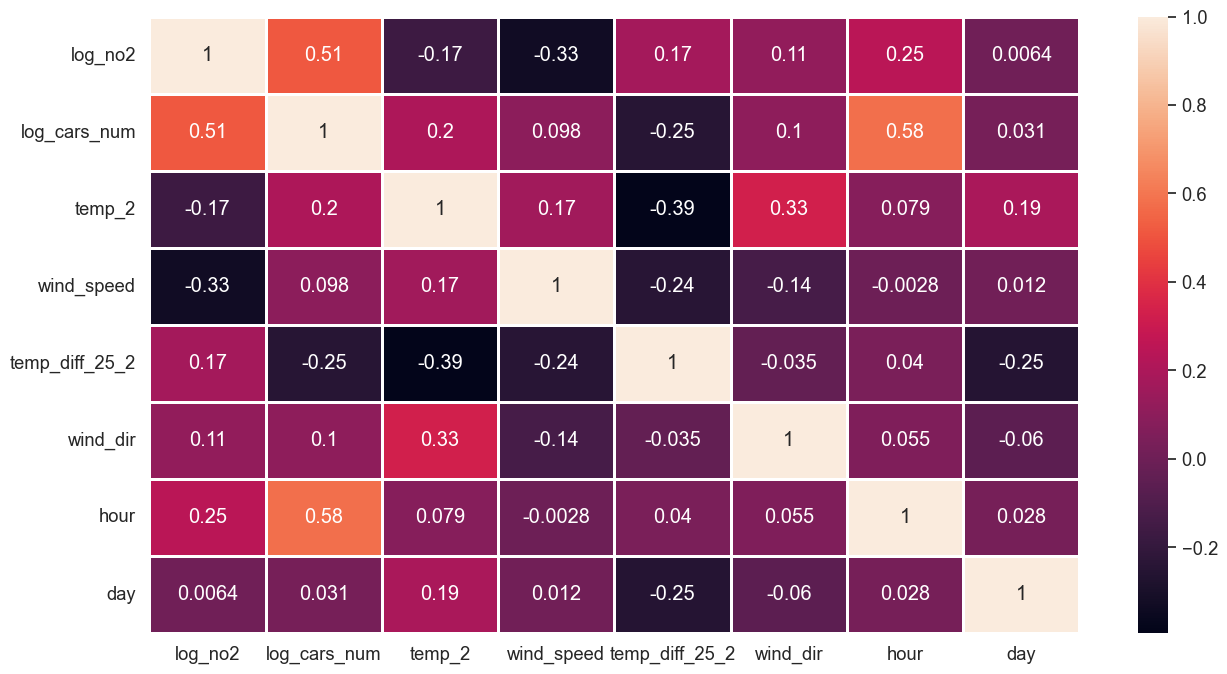

In [33]:
corr_matrix = data[list(data.columns)[:8]].corr()
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2)

sns.heatmap(corr_matrix, annot=True, linewidth=1)
plt.show()

**Simple Linear Regression to analyze the contribution of factors**

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [35]:
def show_model_results(regressor, y_predict):
    for coef, variable in zip(regressor.coef_, x_labels):
        print("For variable: {} the value of the coefficient is: {}".format(variable, coef))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=x_labels, y=regressor.coef_)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    
    print("\n\033[1mMean squared error: {}\033[0m".format(mean_squared_error(y_test, y_predict)))

In [36]:
x = data[x_labels]
y = data[y_label]

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=200)

In [37]:
# simple LinearRegression 
linear_regressor = LinearRegression()

linear_regressor.fit(x_train, y_train)
y_predict_lr = linear_regressor.predict(x_test)

For variable: log_cars_num the value of the coefficient is: 0.5664386236306982
For variable: temp_2 the value of the coefficient is: -0.15333558970901304
For variable: wind_speed the value of the coefficient is: -0.22863262823215022
For variable: temp_diff_25_2 the value of the coefficient is: 0.18385413698188768
For variable: wind_dir the value of the coefficient is: 0.04650949594991695
For variable: hour the value of the coefficient is: -0.1384013012484544
For variable: day the value of the coefficient is: 0.10161958441709054


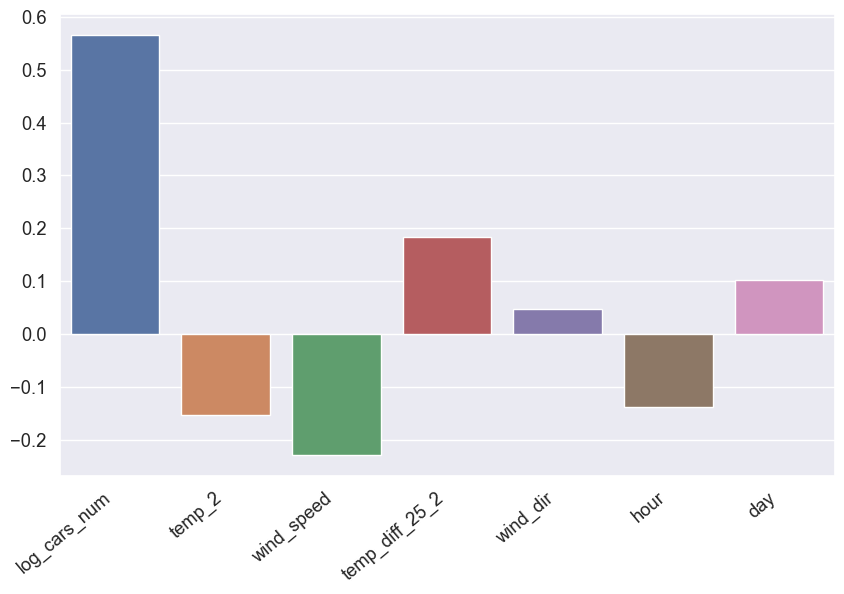


Mean squared error: 0.3330201520707627


In [38]:
# result visualization (simple LinearRegression)
show_model_results(linear_regressor, y_predict_lr)